## Titanic kaggle competition score  69 genuine.. and worth learning 

In [8]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from numpy.random import seed

seed(11111)

In [9]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Putting on index to each dataset before split it
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

# dataframe 
df = pd.concat([train, test], axis=0, sort=False)

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1.0,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0.0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0.0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0.0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1.0,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,3,"Cash, Cheryle",female,27.00,0,0,7686,10.12,NaN,Q
199996,NaN,1,"Brown, Howard",male,59.00,1,0,13004,68.31,NaN,S
199997,NaN,3,"Lightfoot, Cameron",male,47.00,0,0,4383317,10.87,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 11 columns):
Survived    100000 non-null float64
Pclass      200000 non-null int64
Name        200000 non-null object
Sex         200000 non-null object
Age         193221 non-null float64
SibSp       200000 non-null int64
Parch       200000 non-null int64
Ticket      190196 non-null object
Fare        199733 non-null float64
Cabin       61303 non-null object
Embarked    199473 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 18.3+ MB


In [11]:
df.isna().sum()

Survived    100000
Pclass           0
Name             0
Sex              0
Age           6779
SibSp            0
Parch            0
Ticket        9804
Fare           267
Cabin       138697
Embarked       527
dtype: int64

In [12]:
# Sex
change = {'female':0,'male':1}
df.Sex = df.Sex.map(change)

# Embarked
change = {'S':0,'C':1,'Q':2}
df.Embarked = df.Embarked.map(change)

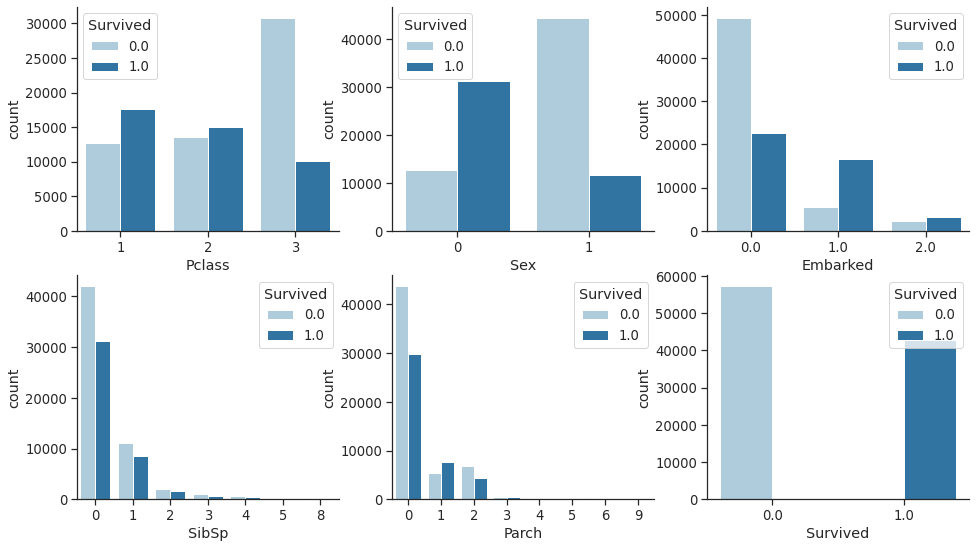

In [13]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, hue='Survived', palette='Paired')
    
sns.despine()

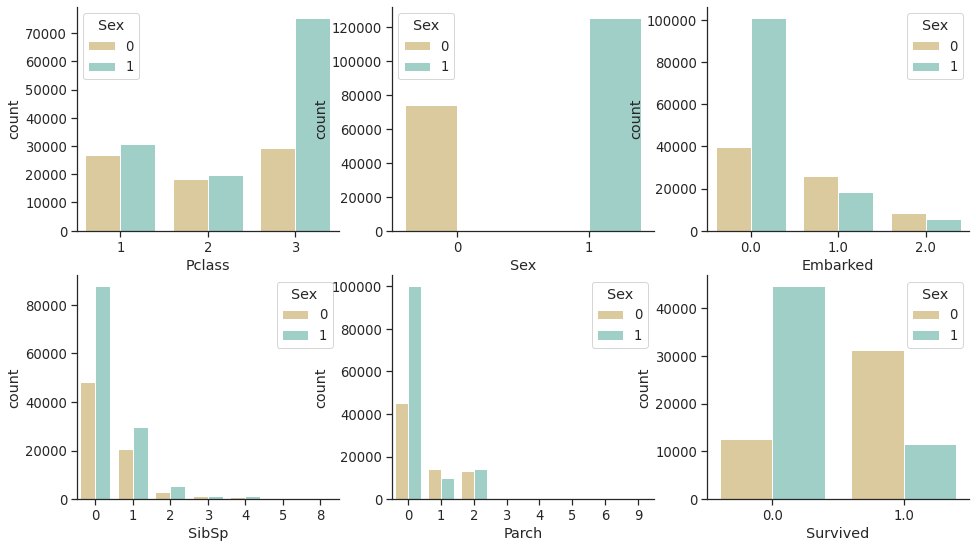

In [14]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, hue='Sex', palette='BrBG')
    
sns.despine()


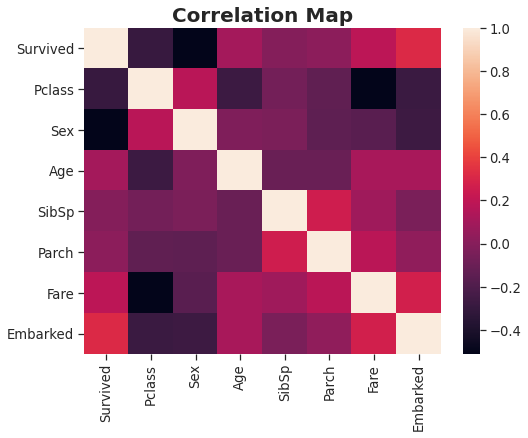

In [15]:
corr_df = df.corr()
fig, axs = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [16]:
df.groupby(['Pclass','Sex','Survived'])['Age'].median()

Pclass  Sex  Survived
1       0    0.0         50.00
             1.0         49.00
        1    0.0         44.00
             1.0         45.00
2       0    0.0         36.00
             1.0         41.00
        1    0.0         36.25
             1.0         39.00
3       0    0.0         27.00
             1.0         29.00
        1    0.0         32.00
             1.0         28.00
Name: Age, dtype: float64

In [17]:
#Filling the missing values with mean of Pclass and Sex.
df["Age"].fillna(df.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)


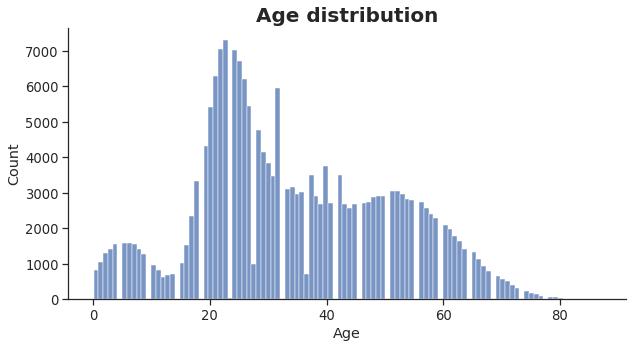

In [18]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='Age').set_title("Age distribution",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

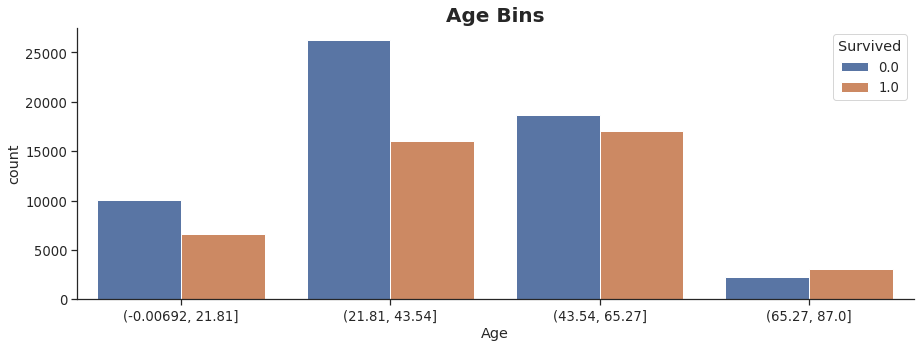

In [19]:
auxage = pd.cut(df['Age'], 4)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxage, hue='Survived', data=df).set_title("Age Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()



In [20]:
# converting to categorical
df['Age'] = LabelEncoder().fit_transform(auxage) 


In [21]:
pd.crosstab(df['Age'], df['Survived'])

Survived,0.0,1.0
Age,,
0,10097,6585
1,26220,16017
2,18635,17082
3,2274,3090


In [22]:
df["Fare"].fillna(df.groupby(['Pclass', 'Sex'])['Fare'].transform("median"), inplace=True)

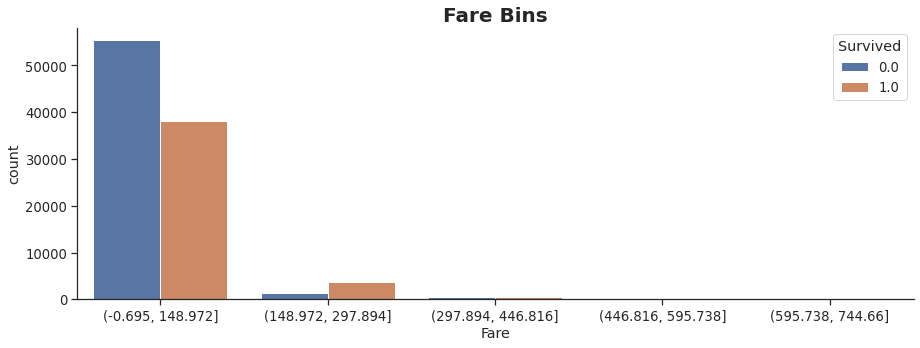

In [23]:
auxfare = pd.cut(df['Fare'],5)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxfare, hue='Survived', data=df).set_title("Fare Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [24]:
df['Fare'] = LabelEncoder().fit_transform(auxfare) 

In [25]:
pd.crosstab(df['Fare'], df['Survived'])

Survived,0.0,1.0
Fare,,
0,55323,38182
1,1311,3791
2,391,386
3,194,342
4,7,73


In [26]:
print("mean of embarked",df.Embarked.median())

df.Embarked.fillna(df.Embarked.median(), inplace = True)


mean of embarked 0.0


In [27]:
print("Percentage of missing values in the Cabin column :" ,round(df.Cabin.isna().sum()/ len(df.Cabin)*100,2))

Percentage of missing values in the Cabin column : 69.35


In [28]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [50]:
df['Name']

PassengerId
0           Oconnor, Frankie
1                Bryan, Drew
2             Owens, Kenneth
3              Kramer, James
4              Bond, Michael
                 ...        
199995         Cash, Cheryle
199996         Brown, Howard
199997    Lightfoot, Cameron
199998    Jacobsen, Margaret
199999      Fishback, Joanna
Name: Name, Length: 200000, dtype: object

In [51]:
df['Name'] = df.Name.str.extract('([A-Za-z]+)\.', expand = False)


In [53]:
df['Name']

PassengerId
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
199995    NaN
199996    NaN
199997    NaN
199998    NaN
199999    NaN
Name: Name, Length: 200000, dtype: object

In [52]:
#df.Name.value_counts()

Series([], Name: Name, dtype: int64)

In [54]:
df.drop(['Name'], axis = 1, inplace = True)
"""
least_occuring = ['Rev','Dr','Major', 'Col', 'Capt','Jonkheer','Countess']

df.Title = df.Title.replace(['Ms', 'Mlle','Mme','Lady'], 'Miss')
df.Title = df.Title.replace(['Countess','Dona'], 'Mrs')
df.Title = df.Title.replace(['Don','Sir'], 'Mr')

df.Title = df.Title.replace(least_occuring,'Rare')

df.Title.unique()
"""

"\nleast_occuring = ['Rev','Dr','Major', 'Col', 'Capt','Jonkheer','Countess']\n\ndf.Title = df.Title.replace(['Ms', 'Mlle','Mme','Lady'], 'Miss')\ndf.Title = df.Title.replace(['Countess','Dona'], 'Mrs')\ndf.Title = df.Title.replace(['Don','Sir'], 'Mr')\n\ndf.Title = df.Title.replace(least_occuring,'Rare')\n\ndf.Title.unique()\n"

In [56]:
#pd.crosstab(df['Name'], df['Survived'])

In [33]:
#df['Name'] = LabelEncoder().fit_transform(df['Title']) 

In [34]:
# I got the total number of each family adding SibSp and Parch. (1) is the same passenger.
df['FamilySize'] = df['SibSp'] + df['Parch']+1
df.drop(['SibSp','Parch'], axis = 1, inplace = True)

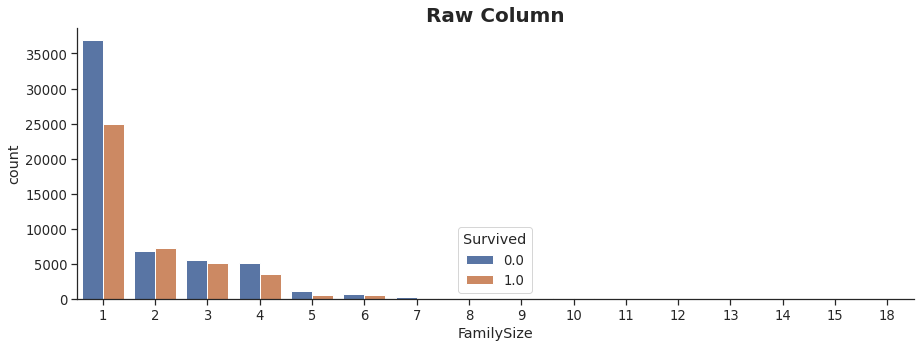

In [35]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df).set_title("Raw Column",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()


In [36]:
# Binning FamilySize column
df.loc[ df['FamilySize'] == 1, 'FamilySize'] = 0                            # Alone
df.loc[(df['FamilySize'] > 1) & (df['FamilySize'] <= 4), 'FamilySize'] = 1  # Small Family 
df.loc[(df['FamilySize'] > 4) & (df['FamilySize'] <= 6), 'FamilySize'] = 2  # Medium Family
df.loc[df['FamilySize']  > 6, 'FamilySize'] = 3                             # Large Family 

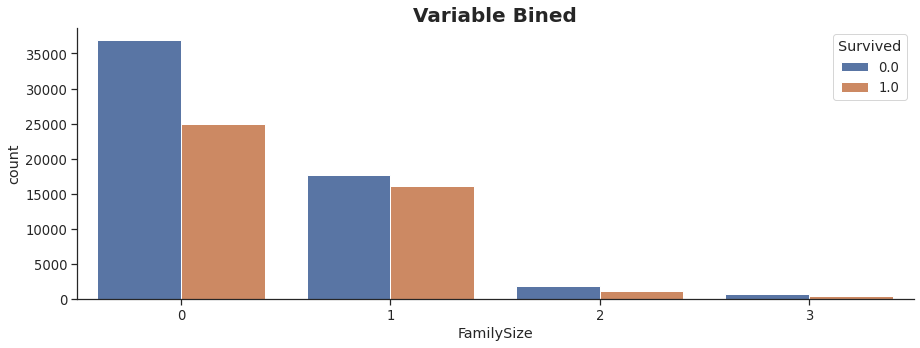

In [37]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df).set_title("Variable Bined",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()


In [62]:
df['Ticket'] = df['Ticket'].str.extract('(\d+)', expand=False)

PassengerId
0          209245
1           27323
2          457703
3           10866
4          427635
           ...   
199995       7686
199996      13004
199997    4383317
199998      26988
199999      41824
Name: Ticket, Length: 200000, dtype: object

In [65]:
#df['Ticket'] = df.Ticket.str.split().apply(lambda x : 0 if x[:][-1] == 'LINE' else x[:][-1])
df['Ticket'].fillna((df['Ticket'].median()), inplace=True)

In [66]:
df.Ticket = df.Ticket.values.astype('int64')

In [68]:
#df['LastName'] = last= df.Name.str.extract('^(.+?),', expand = False)


In [ ]:
#df['WomChi'] = ((df.Title == 0) | (df.Sex == 0))


In [ ]:
family = df.groupby([df.LastName, df.Pclass, df.Ticket]).Survived

df['FTotalCount'] = family.transform(lambda s: s[df.WomChi].fillna(0).count())
df['FTotalCount'] = df.mask(df.WomChi, (df.FTotalCount - 1), axis=0)

df['FSurvivedCount'] = family.transform(lambda s: s[df.WomChi].fillna(0).sum())
df['FSurvivedCount'] = df.mask(df.WomChi, df.FSurvivedCount - df.Survived.fillna(0), axis=0)

df['FSurvivalRate'] = (df.FSurvivedCount / df.FTotalCount.replace(0, np.nan))

In [69]:
df.isna().sum()

Survived      100000
Pclass             0
Sex                0
Age                0
Ticket             0
Fare               0
Embarked           0
Title              0
FamilySize         0
dtype: int64

In [71]:
# filling the missing values
#df.FSurvivalRate.fillna(0, inplace = True)
#df.FTotalCount.fillna(0, inplace = True)
#df.FSurvivedCount.fillna(0, inplace = True)

In [ ]:
# You can review the result Family Survival Rate with these Families Heikkinen, Braund, Rice, Andersson,
# Fortune, Asplund, Spector,Ryerson, Allison, Carter, Vander, Planke

#df[df['LastName'] == "Dean"]



In [76]:
# Model
df['PassengerId'] = df.index

In [81]:
df = pd.get_dummies(df, columns=['Sex','Fare','Pclass'])

In [79]:
df.drop(['Embarked','Title'], axis = 1, inplace = True) 
#'Name','LastName','WomChi','FTotalCount','FSurvivedCount','Embarked','Title'


In [80]:
df.columns


Index(['Survived', 'Age', 'Ticket', 'FamilySize', 'PassengerId', 'Sex_0',
       'Sex_1', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3', 'Fare_4', 'Pclass_1',
       'Pclass_2', 'Pclass_3'],
      dtype='object')

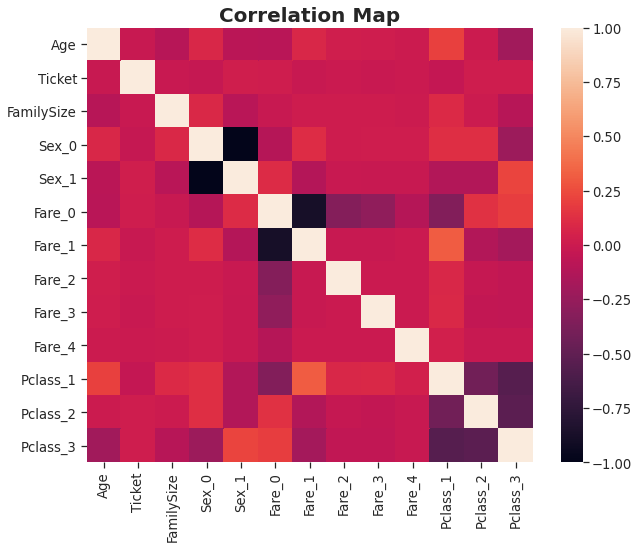

In [82]:
# I splitted df to train and test
train, test = df.loc[train.index], df.loc[test.index]

X_train = train.drop(['PassengerId','Survived'], axis = 1)
Y_train = train["Survived"]
train_names = X_train.columns

X_test = test.drop(['PassengerId','Survived'], axis = 1)

corr_train = X_train.corr()
fig, axs = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_train).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
plt.show()



In [83]:
# Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


In [84]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_predDT = decision_tree.predict(X_test)

print("Accuracy of the model: ",round(decision_tree.score(X_train, Y_train) * 100, 2))


Accuracy of the model:  97.36


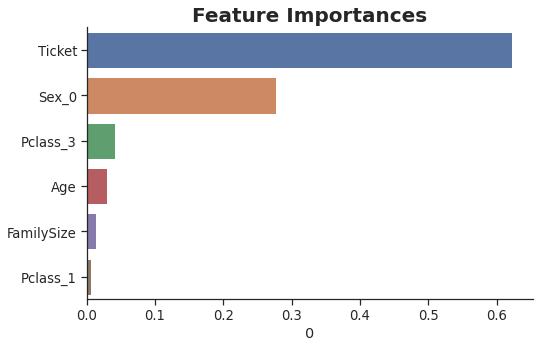

In [85]:
importances = pd.DataFrame(decision_tree.feature_importances_, index = train_names)
importances.sort_values(by = 0, inplace=True, ascending = False)
importances = importances.iloc[0:6,:] 

plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances,palette="deep").set_title("Feature Importances",
                                                                                 fontdict= { 'fontsize': 20,
                                                                                            'fontweight':'bold'});
sns.despine()

In [87]:
submit = pd.DataFrame({"PassengerId":test.PassengerId, 'Survived':Y_predDT.astype(int).ravel()})
submit.to_csv("submission_apr_1.csv",index = False)